<a href="https://colab.research.google.com/github/JosHDed/colour-identification-in-images/blob/main/CV_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: Joshua Raj

TASK 1: Color Identification in Images

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from IPython.display import Image
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
# Defining functions for importing image and color conversions
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
from google.colab import files
files.upload()

Saving kirby.jpg to kirby.jpg


{'kirby.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x00\x00\x00\x00\x00\xff\xe1\x00.Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x02@\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00@\x01\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\n\x07\x07\t\x07\x06\n\t\x08\t\x0b\x0b\n\x0c\x0f\x19\x10\x0f\x0e\x0e\x0f\x1e\x16\x17\x12\x19$ &%# #"(-90(*6+"#2D26;=@@@&0FKE>J9?@=\xff\xdb\x00C\x01\x0b\x0b\x0b\x0f\r\x0f\x1d\x10\x10\x1d=)#)==================================================\xff\xc0\x00\x11\x08\x01\x81\x01\xda\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x9

In [ ]:
!ls

kirby.jpg  sample_data


In [ ]:
image = get_image('kirby.jpg')
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# To get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

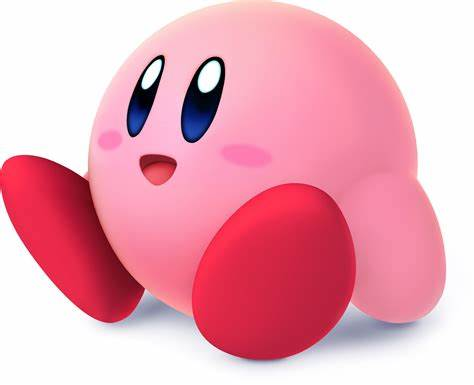

In [ ]:
# Displaying the Image
Image(filename='kirby.jpg') 

([<matplotlib.patches.Wedge at 0x7f5017a9cfd0>,
 [Text(0.41490416973848654, 1.0187514564080964, '#fcfcfc'),
  Text(-0.9765972058650405, 0.5062192188139403, '#f286a0'),
  Text(-1.0733731939298266, -0.2405618144113552, '#19317c'),
  Text(-0.45649143789719426, -1.000807457569413, '#f7bfcf'),
  Text(0.1696927180774685, -1.0868322692262504, '#09081a'),
  Text(0.3155520110818253, -1.053767967012765, '#8a1427'),
  Text(0.4276736979677847, -1.0134570578305526, '#c42341'),
  Text(0.7314302094099133, -0.8215898300019118, '#fc9eb8'),
  Text(0.9470503563772424, -0.5595494817134034, '#a5a2b5'),
  Text(1.0636107649407849, -0.2805924815494502, '#ea2b4b')])

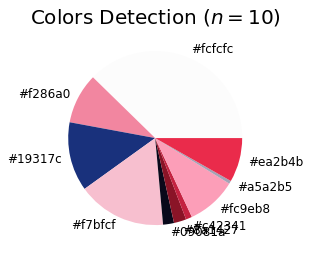

In [ ]:
# Final Output
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)